<a href="https://colab.research.google.com/github/RaminTKhameneh/SYS611HWs/blob/main/Final%20Project%20-%201.31.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from copy import deepcopy as dc
import matplotlib.pyplot as plt

In [ ]:
tractPop = 100
agents = list(range(tractPop))
capServer1 = 4
capServer2 = 5
capServer3 = 6
capServer4 = 7
servTime1 = 10 #sec
servTime2 = 10
servTime3 = 10
servTime4 = 10
time = []
for i in range(tractPop):
  time.append([0,0,0])

In [ ]:

observed = np.array([0.07679136, 1.00314247, 3.25534653, 3.05477226, 2.23001094,
       4.87770017, 4.33580912, 2.94331847, 2.45502635, 0.46241992,
       1.97285427, 0.55171449, 0.5674046 , 1.42803054, 2.79434385,
       3.292723  , 2.1658134 , 0.22619236, 1.35588331, 3.80851642,
       0.78955397, 1.17603395, 2.50094993, 0.69882881, 1.37543226,
       1.62290372, 2.08876111, 0.42200264, 1.21106097, 1.3053981 ])
np.average(observed)

# np.random.exponential(1.5,size = 30)


1.8682913096666665

In [ ]:
enterTimeServ = (np.random.exponential(1.87,size = 1000))


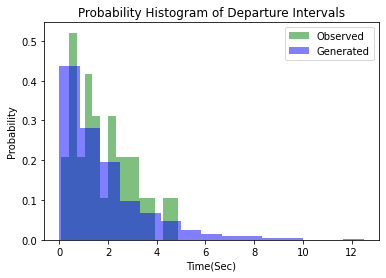

In [ ]:
# Normalize
kwargs = dict(alpha=0.5, bins=15, density=True, stacked=True)

# Plot
plt.hist(observed, **kwargs, color='g', label='Observed')
plt.hist(enterTimeServ, **kwargs, color='b', label='Generated')
plt.gca().set(title='Probability Histogram of Departure Intervals', xlabel = 'Time(Sec)', ylabel='Probability')
plt.legend();

In [ ]:
def server(server,capServer,agents,time,temp,sink,servTime):
  if len(server) < capServer:
    print(agents[0],'left home')
    server.append(agents[0])
    enterTimeServ = (np.random.exponential(1))
    time[agents[0]][0] = enterTimeServ + temp
    temp = dc(time[agents[0]][0])
    agents.pop(0)

  #if server is full wait to one agent leave the server
  elif len(server) == capServer:
    print('server is full, first car exit')
    sink.append(server[0])
    time[server[0]][1] = dc(servTime + time[server[0]][0])
    server.pop(0)

  #if server is not full but one agent fully served
  tempSum = 0
  for ele in server:
    tempSum += time[ele][0]

  while tempSum >= servTime:
    print('first car needs to exit')
    sink.append(server[0])
    time[server[0]][1] = dc(servTime + time[server[0]][0])
    server.pop(0)
    tempSum = 0
    for ele in server:
      tempSum += time[ele][0]
  return server,capServer,agents,time,temp,sink,servTime


def levelIIserver(server, capServer, agent, agents,time,temp,sink,servTime):
  if len(server) < capServer:
    print(agents[0],'left home')
    server.append(agents[0])
    enterTimeServ = (np.random.exponential(1))
    time[agents[0]][0] = enterTimeServ + temp
    temp = dc(time[agents[0]][0])
    agents.pop(0)

  #if server is full wait to one agent leave the server
  elif len(server) == capServer:
    print('server is full, first car exit')
    sink.append(server[0])
    time[server[0]][1] = dc(servTime + time[server[0]][0])
    server.pop(0)

  #if server is not full but one agent fully served
  tempSum = 0
  for ele in server:
    tempSum += time[ele][0]

  while tempSum >= servTime:
    print('first car needs to exit')
    sink.append(server[0])
    time[server[0]][1] = dc(servTime + time[server[0]][0])
    server.pop(0)
    tempSum = 0
    for ele in server:
      tempSum += time[ele][0]
  return server,capServer,agents,time,temp,sink,servTime


In [ ]:
server1 = []
server2 = []
server3 = []
sink = []
temp1 = 0
temp2 = 0
temp3 = 0
temp4 = 0

#if there is any agents in home send them to street
while len(agents) > 0:
  p = np.random.random()
  if p < 1/3:
    print('server1')
    server1,capServer1,agents,time,temp1,sink,servTime1 = dc(server(server1,capServer1,agents,time,temp1,sink,servTime1))
  elif p < 2/3:
    print('server2') 
    server2,capServer2,agents,time,temp2,sink,servTime2 = dc(server(server2,capServer2,agents,time,temp2,sink,servTime2)) 
  else:
    print('server3')
    server3,capServer3,agents,time,temp3,sink,servTime3 = dc(server(server3,capServer3,agents,time,temp3,sink,servTime3))
  print()

# if there are only cars in street, send them to the sink
while len(server1) > 0:
    sink.append(server1[0])
    server1.pop(0)
    time[server1[0]][1] = dc(servTime1 + time[server1[0]][0])

while len(server2) > 0:
    sink.append(server2[0])
    server2.pop(0)
    time[server2[0]][1] = dc(servTime2 + time[server2[0]][0])

while len(server3) > 0:
    sink.append(server3[0])
    server3.pop(0)
    time[server3[0]][1] = dc(servTime3 + time[server3[0]][0])

server1
0 left home

server2
1 left home

server3
2 left home

server3
3 left home

server2
4 left home

server2
5 left home

server1
6 left home

server3
7 left home

server1
8 left home

server1
9 left home

server3
10 left home

server1
server is full, first car exit

server2
11 left home

server3
12 left home
first car needs to exit
first car needs to exit
first car needs to exit

server2
13 left home

server3
14 left home
first car needs to exit
first car needs to exit

server2
server is full, first car exit

server2
15 left home
first car needs to exit
first car needs to exit
first car needs to exit

server1
16 left home

server3
17 left home
first car needs to exit

server1
server is full, first car exit

server1
18 left home
first car needs to exit

server2
19 left home
first car needs to exit
first car needs to exit

server3
20 left home
first car needs to exit

server1
21 left home
first car needs to exit
first car needs to exit

server1
22 left home
first car needs to exit



In [ ]:
time[0:10]

[[0.634486416245834, 10.634486416245833],
 [0.09582121494667718, 10.095821214946676],
 [0.9563910130796803, 10.95639101307968],
 [1.374097494641774, 11.374097494641774],
 [0.7113366144974587, 10.711336614497458],
 [1.5373835156700129, 11.537383515670014],
 [1.2499097631357072, 11.249909763135708],
 [2.3002723686894355, 12.300272368689436],
 [1.8260009749564303, 11.82600097495643],
 [2.839787056750679, 12.83978705675068]]

In [ ]:
server1,server2,server3

([], [], [])

In [ ]:
server1 = []
enterTimeServ1 = []
sink = []
temp = 0

#if there is any agents in home send them to street
while len(agents) > 0:
  if len(server1) < capServer1:
    server1.append(agents[0])
    enterTimeServ1 = (np.random.exponential(5))
    time[agents[0]][0] = enterTimeServ1 + temp
    temp = dc(time[agents[0]][0])
    agents.pop(0)

  #if server is full wait to one agent leave the server
  elif len(server1) == capServer1:
    sink.append(server1[0])
    time[server1[0]][1] = dc(servTime1 + time[server1[0]][0])
    server1.pop(0)
    # time[agents[counter][0]] = enterTimeServ1 + time[agents[counter-1][0]]

    # time.append(time[-1] + servTime1 - sum(enterTimeServ1))

  #if server is not full but one agent fully served
  tempSum = 0
  for ele in server1:
    tempSum += time[ele][0]

  while tempSum >= servTime1:
    sink.append(server1[0])
    time[server1[0]][1] = dc(servTime1 + time[server1[0]][0])
    server1.pop(0)
    tempSum = 0
    for ele in server1:
      tempSum += time[ele][0]
    


  # # while sum(enterTimeServ1) > servTime1:
  #   sink.append(server1[0])
  #   time[server1[0]][1] = dc(servTime1 + time[server1[0]][0])
  #   server1.pop(0)
  #   enterTimeServ1.pop(0)

#if there are only cars in street, send them to the sink
while len(server1) > 0:
    sink.append(server1[0])
    server1.pop(0)
    enterTimeServ1.pop(0)
    time[server1[0]][1] = dc(servTime1 + time[server1[0]][0])


In [ ]:
time[-1][1]/3600

1.460671055370169

0.842425959678081

In [ ]:
remainedAgents = tractPop

# agentInServer1 = 0
# agentInServer2 = 0
# agentInServer3 = 0
# agentInServer4 = 0

server1 = []
enterTimeServ1 = []
sink = []
time = [0]

#if there is any agents in home send them to street
while len(agents) > 0:

  #enter agent to server
  if len(server1) < capServer1:
    server1.append(agents[0])
    enterTimeServ1.append(np.random.exponential(5))
    agents.pop(0)
    # time.append(time[-1] + enterTimeServ1[-1])

  #if server is full wait to one agent leave the server
  else:
    # time.append(time[-1] + servTime1 - sum(enterTimeServ1))
    sink.append(server1[0])
    server1.pop(0)
    enterTimeServ1.pop(0)

  while sum(enterTimeServ1) > servTime1:
    sink.append(server1[0])
    server1.pop(0)
    enterTimeServ1.pop(0)

#if there are only cars in street, send them to the sink
while len(server1) > 0:
    sink.append(server1[0])
    server1.pop(0)
    enterTimeServ1.pop(0)


  #  if  sum(enterTimeServ1) < servTime1:
  #   time += max(servTime1,sum(enterTimeServ1))
  #if car recived to sink then remove it from server and add it to the center
  # while sum(enterTimeServ1) >= servTime1:
  #   sink.append(server1[0])
  #   server1.pop(0)
  #   enterTimeServ1.pop(0)
  #   print(server1)

In [ ]:
sum(enterTimeServ1)

0

In [ ]:
len(sink)

0